<a href="https://colab.research.google.com/github/Yunkoo-GIT/Programming/blob/main/20210603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/30
469/469 - 34s - loss: 0.2007 - accuracy: 0.9374 - val_loss: 0.0718 - val_accuracy: 0.9774
Epoch 2/30
469/469 - 2s - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0386 - val_accuracy: 0.9881
Epoch 3/30
469/469 - 2s - loss: 0.0384 - accuracy: 0.9880 - val_loss: 0.0377 - val_accuracy: 0.9872
Epoch 4/30
469/469 - 2s - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0338 - val_accuracy: 0.9900
Epoch 5/30
469/469 - 2s - loss: 0.0237 - accuracy: 0.9927 - val_loss: 0.0384 - val_accuracy: 0.9883
Epoch 6/30
469/469 - 2s - loss: 0.0180 - accuracy: 0.9941 - val_loss: 0.0382 - val_accuracy: 0.9889
Epoch 7/30
469/469 - 2s - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0311 - val_accuracy: 0.9901
Epoch 8/30
469/469 - 2s - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0363 - val_accuracy: 0.9889
Epoch 9/30
469/469 - 2s - loss: 0.0118 - accuracy: 0.9964 - val_loss: 0.0404 - val_accuracy: 0.9889
Epoch 10/30
469/469 - 2s - loss: 0

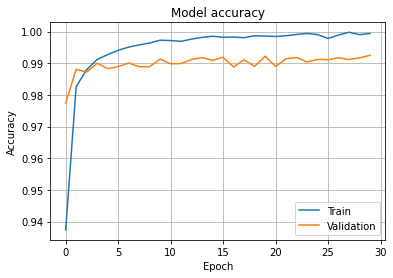

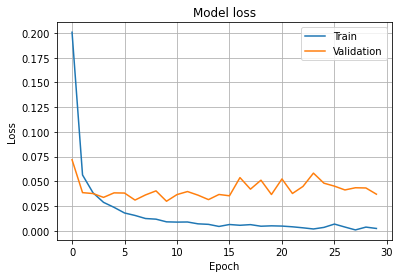

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)= mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# LeNet-5 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(6,(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(16,(5,5),padding='same',activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Conv2D(120,(5,5),padding='same',activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(84,activation='relu'))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

Epoch 1/12
469/469 - 4s - loss: 0.2339 - accuracy: 0.9289 - val_loss: 0.0578 - val_accuracy: 0.9822
Epoch 2/12
469/469 - 3s - loss: 0.0809 - accuracy: 0.9759 - val_loss: 0.0355 - val_accuracy: 0.9881
Epoch 3/12
469/469 - 3s - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 4/12
469/469 - 3s - loss: 0.0497 - accuracy: 0.9849 - val_loss: 0.0306 - val_accuracy: 0.9896
Epoch 5/12
469/469 - 3s - loss: 0.0432 - accuracy: 0.9863 - val_loss: 0.0284 - val_accuracy: 0.9913
Epoch 6/12
469/469 - 3s - loss: 0.0367 - accuracy: 0.9887 - val_loss: 0.0276 - val_accuracy: 0.9917
Epoch 7/12
469/469 - 3s - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0282 - val_accuracy: 0.9912
Epoch 8/12
469/469 - 3s - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0266 - val_accuracy: 0.9919
Epoch 9/12
469/469 - 3s - loss: 0.0264 - accuracy: 0.9912 - val_loss: 0.0257 - val_accuracy: 0.9937
Epoch 10/12
469/469 - 3s - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0261 - val_accuracy: 0.9925

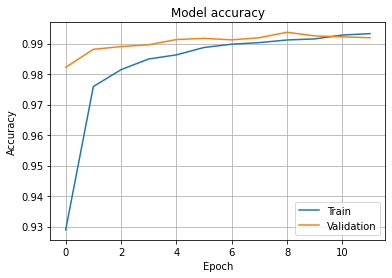

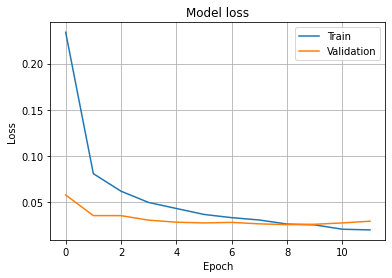

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()